In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd drive/My\ Drive/Flood\ Prediction

/content/drive/My Drive/Flood Prediction


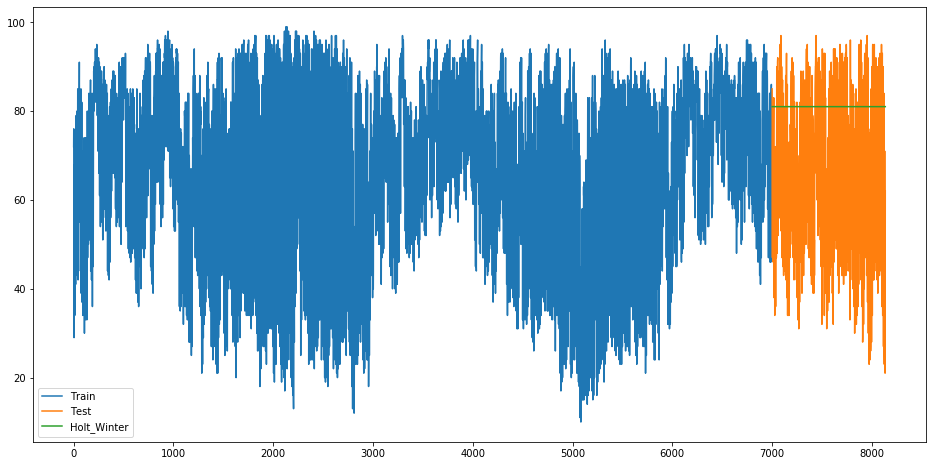

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

dataset = pd.read_csv('rajahmundry_finall.csv')
train = dataset[0:7000]
test = dataset[7001:]

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Humidity'])).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Humidity'], label='Train')
plt.plot(test['Humidity'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [0]:
dataset.columns = ['num', 'Date', 'Time', 'Temperature', 'Wind', 'Pressure',
       'Humidity', 'Precipation', 'Heavyrainfall', 'LMH']
       

In [64]:
dataset.columns

Index(['num', 'Date', 'Time', 'Temperature', 'Wind', 'Pressure', 'Humidity',
       'Precipation', 'Heavyrainfall', 'LMH'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


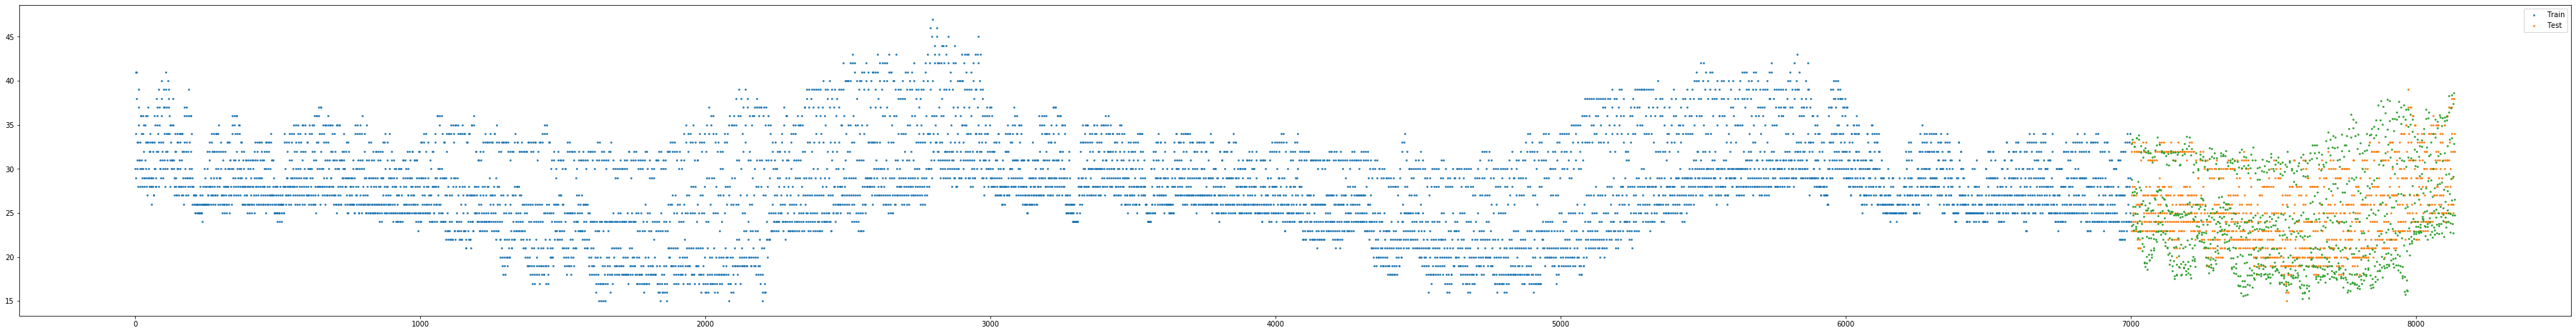

In [103]:
# HOLT'S WINTER MODEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#df = pd.read_csv('rajahmundry_finall.csv',parse_dates=['Month'],index_col='Month')
#df = pd.read_csv('rajahmundry_finall.csv')
df = dataset
#df.index.freq = '3H'
train, test = df.iloc[:7000,[0,1,3]], df.iloc[7001:,[0,1,3]]
#train
model = ExponentialSmoothing(train.Temperature, seasonal='add', seasonal_periods=2880).fit()
#test.Date[8135]
pred = model.predict(start=test.num[7001], end=test.num[8135])
#test.loc[7001,'Date']
plt.figure(figsize=(64,8))
plt.scatter(train.num, train.Temperature, label='Train',s=3)
plt.scatter(test.num, test.Temperature, label='Test',s=3)
plt.scatter(test.num,pred,s=3)
plt.legend(loc='best')
plt.savefig('holt_winter2880scatter.png')
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt


rms = sqrt(mean_squared_error(test.Temperature, pred))
print(rms)

3.4963791523850887


In [0]:
# SARIMA MODEL

